In [1]:
import pandas as pd
data = pd.read_csv('d:/templates/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
cols = list(data)
cols.insert(8,cols.pop(cols.index('Selling_Price')))
data = data.loc[:,cols]

In [3]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [4]:
data['Years_Driven']  = 0
for i in data.index:
    data['Years_Driven'][i] = 2021 - data['Year'][i]

C:\miniconda\Conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
data = data.drop(columns='Car_Name',axis=1)
data = data.drop(columns='Year',axis=1)

In [6]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Present_Price,Kms_Driven,Owner,Selling_Price,Years_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,3.35,7,0,1,0,1
1,9.54,43000,0,4.75,8,1,0,0,1
2,9.85,6900,0,7.25,4,0,1,0,1
3,4.15,5200,0,2.85,10,0,1,0,1
4,6.87,42450,0,4.60,7,1,0,0,1


In [7]:
data.corr()

,Present_Price,Kms_Driven,Owner,Selling_Price,Years_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Present_Price,1.000000,0.203647,0.008057,0.878983,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.203647,1.000000,0.089216,0.029187,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.008057,0.089216,1.000000,-0.088344,0.182104,-0.053469,0.055687,0.124269,-0.050316
Selling_Price,0.878983,0.029187,-0.088344,1.000000,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Years_Driven,0.047584,0.524342,0.182104,-0.236141,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.473306,0.172515,-0.053469,0.552339,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.465244,-0.172874,0.055687,-0.540571,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.512030,-0.101419,0.124269,-0.550724,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.348715,-0.162510,-0.050316,-0.367128,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [26]:
import seaborn as sn
#sn.pairplot(data)

In [7]:
x = data.iloc[:,1:]
y= data.iloc[:,0]

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [23]:
import matplotlib.pyplot as plt
print(model.feature_importances_)

[0.04125215 0.01464649 0.61678045 0.07095159 0.02144881 0.01615762
 0.13381082 0.08495208]


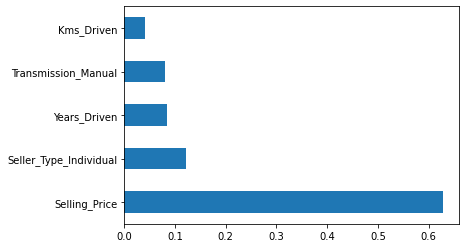

In [12]:
feat_5 = pd.Series(model.feature_importances_,index=x.columns)

feat_5.nlargest(5).plot(kind='barh')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=78)

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [12]:
import numpy as np
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(5,30,num=6)]
min_samples_splits = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [13]:
rand_search = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_splits,
                'min_samples_leaf':min_samples_leaf
                }
print(rand_search)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [14]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(estimator=reg,param_distributions=rand_search,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=45,n_jobs=1)


In [15]:
%%time
rf.fit(xtrain,ytrain)
#reg.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   7.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   6.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=2)

In [17]:
import pickle
pickle.dump(rf,open('d:car_price1.pkl','wb'))

In [21]:
predict = rf.predict(xtest)

In [19]:
value  =rf.predict([[9.85,6900,0,4,0,1,0,1]])
value

array([8.1369955])

In [22]:
from sklearn.metrics import r2_score
r2_score(ytest,predict)

0.9225945568193425

In [106]:
rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

In [107]:
rf.best_score_

-3.636574998790958

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

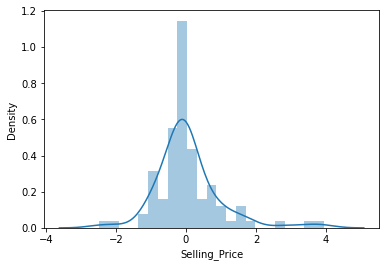

In [108]:
sn.distplot(ytest-predict)

In [23]:
from flask import Flask ,render_template,request
import requests
import numpy as np
app = Flask(__name__)
@app.route('/',methods=['GET'])
def home():
    return render_template('d:templates/car_price.html')

@app.route('/prediction',methods=['POST'])
def predict():
    Fuel_Type_Diesel = 0
    if (request.method)=='POST':
        Years_Driven = int(float(request.form['Years_Driven']))
        Kms_Driven = int(request.form['Kms_Driven'])
        Kms_Driven2=np.log(Kms_Driven)
        Present_Price = int(request.form['Present_Price'])
        Owner = int(request.form['Owner'])
        
        Fuel_Type_Petrol = request.form['Fuel_Type_Petrol']
        if Fuel_Type_Petrol=='Petrol':
            Fuel_Type_Petrol=1
            Fuel_Type_Diesel=0
        elif Fuel_Type_Petrol=='Diesel':
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=1
        else:
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=0
        Years_Driven = 2021 - Years_Driven
        Seller_Type_Individual = request.form['Seller_Type_Individual']
        if Seller_Type_Individual == 'Individual':
            Seller_Type_Individual=1
        else:
            Seller_Type_Individual=0
        Transmission_Manual = request.form['Transmission_Manual']
        if Transmission_Manual=='Manual':
            Transmission_Manual = 1
        else:
            Transmission_Manual = 0
        predictions = rf.predict([[Present_Price,Kms_Driven2,Owner,Years_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual]])
        output = round(predictions[0],2)
        if output<0:
            return render_template('d:templates/car_price.html',predictions_text="Sorry,You can't sell this car")
        else:
            return render_template("d:templates/car_price.html",predictions_text='Your car price is {}'.format(output))
    else:
        return render_template('d:templates/car_price.html')
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Mar/2021 11:04:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2021 11:04:40] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Mar/2021 11:05:25] "POST /prediction HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2021 11:06:17] "POST /prediction HTTP/1.1" 200 -


In [68]:
import pandas as pd
dataset = pd.read_csv('d:/templates/Classified Data.txt',index_col=0)
dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [69]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [70]:
scalar.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler()

In [71]:
standard = scalar.transform(dataset.drop('TARGET CLASS',axis=1))
new_dataset = pd.DataFrame(standard,columns=dataset.columns[:-1])
new_dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_dataset,dataset['TARGET CLASS'])

In [73]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [74]:
 predict = kn.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predict)

array([[115,  17],
       [  8, 110]], dtype=int64)

In [76]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       132
           1       0.87      0.93      0.90       118

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [83]:
errorrate = []
for i in range(1,50):
    kne = KNeighborsClassifier(n_neighbors=i)
    kne.fit(x_train,y_train)
    pred = kne.predict(x_test)
    errorrate.append(np.mean(np.mean(pred!=y_test)))
print(errorrate)

[0.1, 0.08, 0.064, 0.064, 0.068, 0.06, 0.064, 0.068, 0.072, 0.064, 0.064, 0.064, 0.048, 0.056, 0.06, 0.064, 0.048, 0.056, 0.052, 0.056, 0.052, 0.056, 0.052, 0.056, 0.052, 0.056, 0.056, 0.052, 0.056, 0.048, 0.056, 0.056, 0.052, 0.052, 0.06, 0.06, 0.06, 0.052, 0.052, 0.048, 0.052, 0.048, 0.052, 0.048, 0.052, 0.056, 0.056, 0.06, 0.064]


Text(0, 0.5, 'Errorrate')

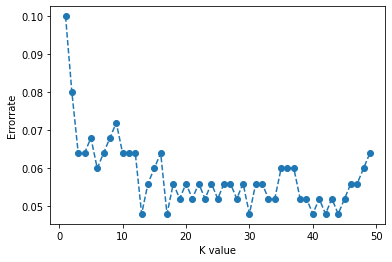

In [85]:
plt.plot(range(1,50),errorrate,linestyle='dashed',marker='o')
plt.xlabel('K value')
plt.ylabel('Errorrate')

In [88]:
kn = KNeighborsClassifier(n_neighbors=23)
kn.fit(x_train,y_train)
pre  = kn.predict(x_test)
confusion_matrix(pre,y_test)
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.93      0.96      0.95       118

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

